In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Read the data from the csv file and drop unnecessary columns.

RawData = pd.read_csv("SDSS17_imaging_data.csv")
data = RawData.drop(['alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'MJD', 'fiber_ID'], axis=1)

# Transform the data from the column 'class' into numeric data:
#   STAR (star) as 0
#   GALAXY (galaxy) as 1
#   QSO (quasar) as 2

data.replace({"STAR": 0, "GALAXY": 1, "QSO": 2}, inplace=True)
print(data.head(5))

         obj_ID         u         g         r         i         z  \
0  1.237661e+18  23.87882  22.27530  20.39501  19.16573  18.79371   
1  1.237665e+18  24.77759  22.83188  22.58444  21.16812  21.61427   
2  1.237661e+18  25.26307  22.66389  20.60976  19.34857  18.94827   
3  1.237663e+18  22.13682  23.77656  21.61162  20.50454  19.25010   
4  1.237680e+18  19.43718  17.58028  16.49747  15.97711  15.54461   

    spec_obj_ID  class  redshift  
0  6.543777e+18      1  0.634794  
1  1.176014e+19      1  0.779136  
2  5.152200e+18      1  0.644195  
3  1.030107e+19      1  0.932346  
4  6.891865e+18      1  0.116123  


In [89]:
# Prepare the data, and set training set size to 0.5, validation set size to 0.3 and test set size to 0.2.

X = data[['u','g', 'r', 'i', 'z', 'redshift']].to_numpy().reshape(-1,6)
y = data['class'].to_numpy()
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.5, random_state=12)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.3, random_state=12)


In [90]:
# Training the model with K-Nearest Neighbors method.

neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

y_pred_train = neigh.predict(X_train)
y_pred_val = neigh.predict(X_val)

acc_train = accuracy_score(y_train, y_pred_train)
print('KNN train accuracy: ', acc_train)

acc_val = accuracy_score(y_val, y_pred_val)
print('KNN val accuracy: ', acc_val)


KNN train accuracy:  0.95892
KNN val accuracy:  0.9455714285714286


Text(0.5, 1.0, 'K-Nearest Neighbors')

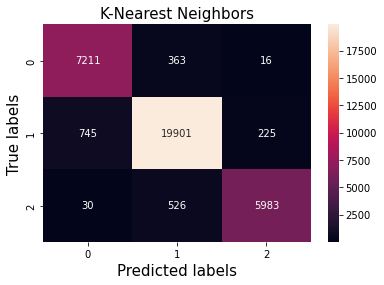

In [91]:
# Graphing a confusion matrix for KNN results.

conf_mat = confusion_matrix(y_val,y_pred_val)
ax= plt.subplot()

sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('K-Nearest Neighbors',fontsize=15)

In [92]:
# Training the model with Decision Tree method. 

dt = DecisionTreeClassifier(criterion='gini', random_state=12, max_depth=8)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_val = dt.predict(X_val)

acc_train = accuracy_score(y_train, y_pred_train)
print('DT train accuracy: ', acc_train)

acc_val = accuracy_score(y_val, y_pred_val)
print('DT val accuracy: ', acc_val)


DT train accuracy:  0.97946
DT val accuracy:  0.973


Text(0.5, 1.0, 'Decision Tree')

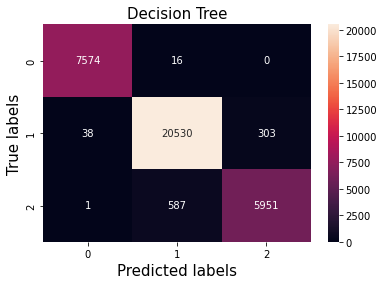

In [93]:
# Graphing a confusion matrix for DT results.

conf_mat = confusion_matrix(y_val,y_pred_val)
ax= plt.subplot()

sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Decision Tree',fontsize=15)

In [94]:
# Calculate the final accuracy with the test set.

y_pred_test = dt.predict(X_test)
acc_test = accuracy_score(y_test,y_pred_test)
print('overall test accuracy: ', acc_test)

overall test accuracy:  0.9756666666666667


Text(0.5, 1.0, 'Final results')

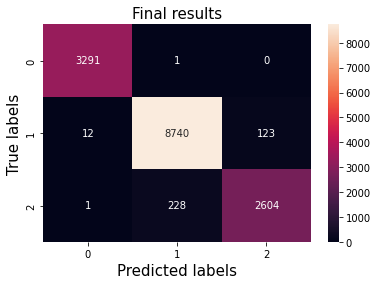

In [95]:
# Graph a confusion matrix to show the accuracy within the final test set.

conf_mat = confusion_matrix(y_test,y_pred_test)
ax= plt.subplot()

sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Final results',fontsize=15)